<a href="https://colab.research.google.com/github/RohanMathur17/Deep-Learning-With-Python-By-Francois-Chollet/blob/master/Chapter%203/CH3_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()  #Sequential class (only for linear stacks of layers)

model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
 #Same model defined using the functional API

input_tensor = layers.Input(shape = ( 784, ))

x = layers.Dense(32 , activation = 'relu')(input_tensor)

output_tensor = layers.Dense(10 , activation = 'softmax')(x)

api_model = models.Model(inputs = input_tensor , outputs = output_tensor)

In [ ]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 0.001),                 #Optimizer & Single Loss Function
              loss = 'mse',
              metrics = ['accuracy'])

In [ ]:
#model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

## **IMDB MOVIE DATASET**

In [ ]:
from keras.datasets import imdb

(train_data , train_labels) , (test_data , test_labels) = imdb.load_data(num_words = 10000)   #Keeping the top 10,000 words

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]  #List of reviews

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]  #1 -> Positive , 0-> Negative

1

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])  #Sample word review of train_data[0] converted to text

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

**Preparing The Data**

In [ ]:
import numpy as np

def vectorize_sequences(sequences , dimension = 10000):

    results = np.zeros((len(sequences), dimension))  #Creates an all-zero matrix of shape (len(sequences), dimension

    for i,sequence in enumerate(sequences):

        results[i,sequence] = 1

    return results

In [ ]:
#Vectorizing data

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
#Vectorizing labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop',                    #Optimizer,loss, metrics can be configured on your own as well
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [ ]:
#Validating our approach

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
#Training your model

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 45ms/step - loss: 0.5379 - acc: 0.7750 - val_loss: 0.4047 - val_acc: 0.8625
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3266 - acc: 0.8947 - val_loss: 0.3176 - val_acc: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2338 - acc: 0.9258 - val_loss: 0.2807 - val_acc: 0.8899
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1826 - acc: 0.9407 - val_loss: 0.2819 - val_acc: 0.8868
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1479 - acc: 0.9526 - val_loss: 0.2772 - val_acc: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1208 - acc: 0.9631 - val_loss: 0.2882 - val_acc: 0.8868
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0994 - acc: 0.9712 - val_loss: 0.3059 - val_acc: 0.8841
Epoch 8/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0835 - a

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

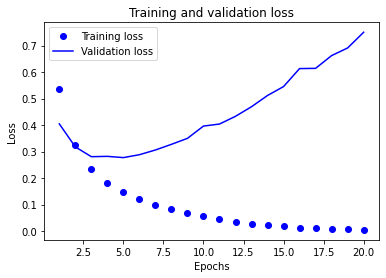

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['val_acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

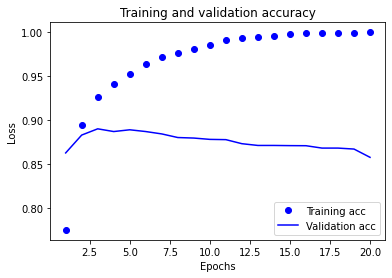

In [ ]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

In [ ]:
#To prevent overfitting , we use only 4 epochs

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 24ms/step - loss: 0.4609 - accuracy: 0.8224
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2684 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2056 - accuracy: 0.9265
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3076 - accuracy: 0.8774


In [ ]:
results

[0.30758264660835266, 0.8773599863052368]